In [4]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_files('benroshan/factors-affecting-campus-placement', unzip=True)

In [8]:
import pandas as pd

placement_df = pd.read_csv("Placement_Data_Full_Class.csv")
placement_df.drop("sl_no", axis = 1, inplace= True)
placement_df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Text(0.5, 1.0, 'Placement Status to Degree Percentages')

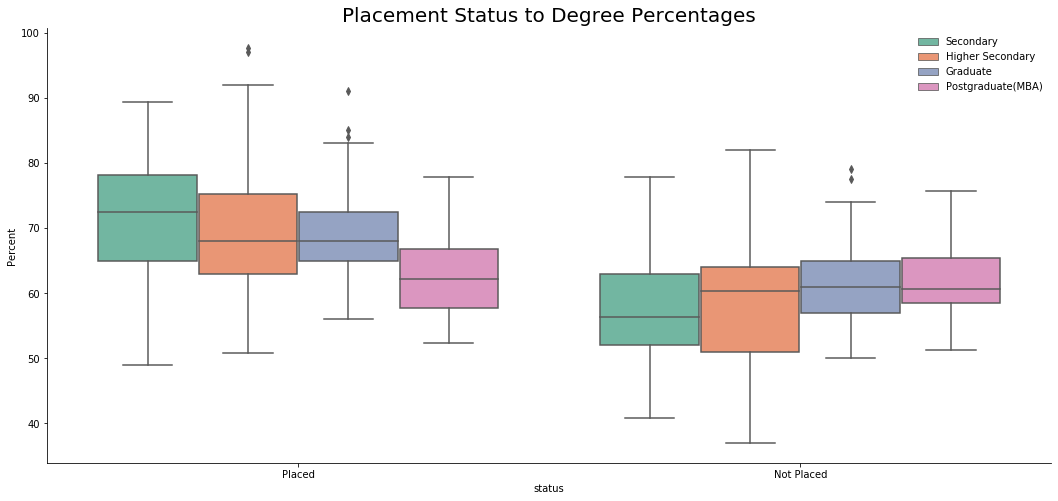

In [54]:
import seaborn as sns

pct_df = placement_df.copy()
cols = ["ssc_p", "hsc_p", "degree_p", "mba_p"]
pct_df = pct_df[cols + ["status"]]
pct_df = pd.melt(pct_df,id_vars = ["status"], value_vars = cols)

pct_df.rename(columns={"value": "Percent"}, inplace = True)
pct_df["variable"].replace(to_replace=cols, value=["Secondary", "Higher Secondary", "Graduate", "Postgraduate(MBA)"], inplace = True)

plt.figure(figsize=(18,8))
pcts = sns.boxplot(x = "status", y= "Percent", hue = "variable", data = pct_df, palette = "Set2")

for spine in ["top", "right"]:
    pcts.spines[spine].set_visible(False)


pcts.legend(frameon=False)
pcts.set_title("Placement Status to Degree Percentages", fontsize=20)